## Try some bond dissociations of PFAS molecules

In [1]:
from nbed.utils import pubchem_mol_geometry, build_ordered_xyz_string, save_ordered_xyz_file

pfoa = pubchem_mol_geometry("Perfluorooctanoic acid")
pfoa_ordered = build_ordered_xyz_string(pfoa, active_atom_inds=[2,20])
save_ordered_xyz_file("pfoa", pfoa, active_atom_inds=[2,20])

/Users/michaelwilliamsdelabastida/Library/Caches/pypoetry/virtualenvs/nbed-1_9TTDE1-py3.10/lib/python3.10/site-packages/pyscf/dft/libxc.py:771: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, corresponding to the original definition by Stephens et al. (issue 1480) and the same as the B3LYP functional in Gaussian. To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


'/Users/michaelwilliamsdelabastida/Code/Nbed/molecular_structures/pfoa.xyz'

In [2]:
pfoa

{0: ('F', (-1.0539, 1.9481, -0.2014)),
 1: ('F', (0.5434, 1.2581, -1.5025)),
 2: ('F', (1.2215, 1.6487, 1.0783)),
 3: ('F', (-0.3328, 0.2934, 1.7581)),
 4: ('F', (-1.8211, 0.1669, -2.1654)),
 5: ('F', (-0.4525, -1.3197, -1.355)),
 6: ('F', (2.0673, -0.7623, 1.9165)),
 7: ('F', (0.8055, -1.7942, 0.487)),
 8: ('F', (-2.9835, -1.7149, -0.6823)),
 9: ('F', (-1.6932, -1.3046, 1.0212)),
 10: ('F', (2.1054, -0.612, -1.6013)),
 11: ('F', (3.3419, -1.7554, -0.2365)),
 12: ('F', (-3.9677, 0.8422, -0.5956)),
 13: ('F', (-2.6826, 1.3007, 1.1093)),
 14: ('F', (-4.1728, -0.274, 1.2669)),
 15: ('O', (4.5699, 0.3287, 0.6742)),
 16: ('O', (3.3666, 1.6773, -0.7043)),
 17: ('C', (-0.2911, 0.8598, -0.5112)),
 18: ('C', (0.5314, 0.5262, 0.7274)),
 19: ('C', (-1.2138, -0.2391, -1.0209)),
 20: ('C', (1.5064, -0.6431, 0.6776)),
 21: ('C', (-2.285, -0.7254, -0.0556)),
 22: ('C', (2.6302, -0.5967, -0.3477)),
 23: ('C', (-3.2786, 0.3, 0.4302)),
 24: ('C', (3.5392, 0.5913, -0.1672)),
 25: ('H', (5.1534, 1.1082, 0

In [3]:
from pyscf.gto import Mole
from pathlib import Path
from pyscf.scf import RHF

filepath = Path("molecular_structures/pfoa.xyz").absolute()
mol = Mole(atom=str(filepath), basis="sto-3g", verbose=4)
mol.build()

mf = RHF(mol)
mf.kernel()

System: uname_result(system='Darwin', node='MacBook-Pro-de-Michael.local', release='23.1.0', version='Darwin Kernel Version 23.1.0: Mon Oct  9 21:32:11 PDT 2023; root:xnu-10002.41.9~7/RELEASE_ARM64_T6030', machine='arm64')  Threads 1
Python 3.10.11 (v3.10.11:7d4cc5aa85, Apr  4 2023, 19:05:19) [Clang 13.0.0 (clang-1300.0.29.30)]
numpy 1.22.4  scipy 1.9.3
Date: Mon Feb 26 12:17:51 2024
PySCF version 2.4.0
PySCF path  /Users/michaelwilliamsdelabastida/Library/Caches/pypoetry/virtualenvs/nbed-1_9TTDE1-py3.10/lib/python3.10/site-packages/pyscf

[CONFIG] conf_file None
[INPUT] verbose = 4
[INPUT] num. atoms = 26
[INPUT] num. electrons = 200
[INPUT] charge = 0
[INPUT] spin (= nelec alpha-beta = 2S) = 0
[INPUT] symmetry False subgroup None
[INPUT] Mole.unit = angstrom
[INPUT] Symbol           X                Y                Z      unit          X                Y                Z       unit  Magmom
[INPUT]  1 F      1.221500000000   1.648700000000   1.078300000000 AA    2.308300461156   3.11

-1918.0405769932213

In [4]:
mf.mo_coeff.shape

(126, 126)

## Build XYZ for different bond lengths

In [113]:
import numpy as np

with open("molecular_structures/pfoa.xyz") as f:
    print(unstretched := f.readlines())
    print(unstretched[2])
    print(unstretched[3])

f_pos = unstretched[2].removesuffix("\n").split("\t")[1:]
c_pos = unstretched[3].removesuffix("\n").split("\t")[1:]
pos_diff = np.array([float(c) - float(f) for f, c in zip(f_pos, c_pos)])
print(pos_diff)
abs_dist = sum([d**2 for d in pos_diff])**(1/2)
distances = np.linspace(0, 3*abs_dist, 16)[1:]
print(distances)
new_pos = [pos_diff * i for i in np.linspace(0, 3, 16)[1:]]
new_pos
for i, distance in enumerate(distances):
    position = new_pos[i]
    with open(f"molecular_structures/pfoa_stretch/pfoa_{distance}.xyz", "w") as f:
        f.write(unstretched[0])
        f.write(unstretched[1])

        f.write(f"F\t{position[0]}\t{position[1]}\t{position[2]}\n")

        for l in unstretched[3:]:
            f.write(l)

['26\n', ' \n', 'F\t1.2215\t1.6487\t1.0783\n', 'C\t1.5064\t-0.6431\t0.6776\n', 'F\t-1.0539\t1.9481\t-0.2014\n', 'F\t0.5434\t1.2581\t-1.5025\n', 'F\t-0.3328\t0.2934\t1.7581\n', 'F\t-1.8211\t0.1669\t-2.1654\n', 'F\t-0.4525\t-1.3197\t-1.355\n', 'F\t2.0673\t-0.7623\t1.9165\n', 'F\t0.8055\t-1.7942\t0.487\n', 'F\t-2.9835\t-1.7149\t-0.6823\n', 'F\t-1.6932\t-1.3046\t1.0212\n', 'F\t2.1054\t-0.612\t-1.6013\n', 'F\t3.3419\t-1.7554\t-0.2365\n', 'F\t-3.9677\t0.8422\t-0.5956\n', 'F\t-2.6826\t1.3007\t1.1093\n', 'F\t-4.1728\t-0.274\t1.2669\n', 'O\t4.5699\t0.3287\t0.6742\n', 'O\t3.3666\t1.6773\t-0.7043\n', 'C\t-0.2911\t0.8598\t-0.5112\n', 'C\t0.5314\t0.5262\t0.7274\n', 'C\t-1.2138\t-0.2391\t-1.0209\n', 'C\t-2.285\t-0.7254\t-0.0556\n', 'C\t2.6302\t-0.5967\t-0.3477\n', 'C\t-3.2786\t0.3\t0.4302\n', 'C\t3.5392\t0.5913\t-0.1672\n', 'H\t5.1534\t1.1082\t0.793\n']
F	1.2215	1.6487	1.0783

C	1.5064	-0.6431	0.6776

[ 0.2849 -2.2918 -0.4007]
[0.4687889  0.93757779 1.40636669 1.87515559 2.34394448 2.81273338
 3.281

In [111]:
from pyscf.gto import Mole
from pathlib import Path
from pyscf.scf import RHF, UHF

filepath = Path("molecular_structures/pfoa_active.xyz").absolute()
mol = Mole(atom=str(filepath), basis="6-31g", verbose=4, spin=1)
mol.build()

mf_active = RHF(mol)
mf_active.kernel()

System: uname_result(system='Darwin', node='MacBook-Pro-de-Michael.local', release='23.1.0', version='Darwin Kernel Version 23.1.0: Mon Oct  9 21:32:11 PDT 2023; root:xnu-10002.41.9~7/RELEASE_ARM64_T6030', machine='arm64')  Threads 1
Python 3.10.11 (v3.10.11:7d4cc5aa85, Apr  4 2023, 19:05:19) [Clang 13.0.0 (clang-1300.0.29.30)]
numpy 1.22.4  scipy 1.9.3
Date: Thu Feb 29 12:40:25 2024
PySCF version 2.4.0
PySCF path  /Users/michaelwilliamsdelabastida/Library/Caches/pypoetry/virtualenvs/nbed-1_9TTDE1-py3.10/lib/python3.10/site-packages/pyscf

[CONFIG] conf_file None
[INPUT] verbose = 4
[INPUT] num. atoms = 2
[INPUT] num. electrons = 15
[INPUT] charge = 0
[INPUT] spin (= nelec alpha-beta = 2S) = 1
[INPUT] symmetry False subgroup None
[INPUT] Mole.unit = angstrom
[INPUT] Symbol           X                Y                Z      unit          X                Y                Z       unit  Magmom
[INPUT]  1 F      1.221500000000   1.648700000000   1.078300000000 AA    2.308300461156   3.1155

init E= -136.305835163609

WARN: HOMO -0.0350782017925164 >= LUMO -0.0350782017925162

cycle= 1 E= -136.743192463284  delta_E= -0.437  |g|= 0.797  |ddm|= 0.749
  HOMO = -0.184182592333583  LUMO = -0.172731378150528
cycle= 2 E= -132.380968037342  delta_E= 4.36  |g|= 4.04  |ddm|= 1.83

WARN: HOMO 1.65814327607364 >= LUMO -0.317690378686618

cycle= 3 E= -134.819323094536  delta_E= -2.44  |g|= 0.876  |ddm|= 2.68
  HOMO = -0.254919367264095  LUMO = -0.194146003791972
cycle= 4 E= -135.476352407561  delta_E= -0.657  |g|= 2.53  |ddm|= 2.39
  HOMO = -0.224469990805904  LUMO = -0.178152557519254
cycle= 5 E= -133.77050591105  delta_E= 1.71  |g|= 3.59  |ddm|= 0.407
  HOMO = -0.254766216501697  LUMO = -0.173952011342652
cycle= 6 E= -135.355180632076  delta_E= -1.58  |g|= 2.63  |ddm|= 0.445
  HOMO = -0.256343142600168  LUMO = -0.17488852674986
cycle= 7 E= -135.462854454102  delta_E= -0.108  |g|= 2.55  |ddm|= 0.199

WARN: HOMO -0.157006681181083 >= LUMO -0.235319709046286

cycle= 8 E= -136.3144895868

-136.9501026351556

In [112]:
mf_active.mo_coeff.shape

(18, 18)

In [7]:
from nbed.driver import NbedDriver
args = {"geometry": pfoa_ordered,
        "n_active_atoms": 2,
        "basis": "sto-3g",
        "xc_functional": "b3lyp",
        "projector": "both",
        "localization": "spade",
        "convergence": 1e-6,
        "max_ram_memory": 8_000,
        }
driver = NbedDriver(**args)

Initialize <pyscf.gto.mole.Mole object at 0x298715900> in <pyscf.dft.rks.RKS object at 0x298714cd0>
Initialize <pyscf.gto.mole.Mole object at 0x298715c60> in <pyscf.dft.rks.RKS object at 0x298716500>
2024-02-26 12:18:55,505: nbed.driver: WARNING: Outputting both mu and huzinaga embedding results as tuple.


In [8]:
driver.embedded_scf[0].mo_coeff.shape

(126, 31)

In [9]:
driver.embedded_scf[0].mo_occ.shape

(31,)

In [11]:
from pyscf import cc
energies = []
emb_ccsd, _ = driver._run_emb_CCSD(driver.embedded_scf[0])
energies.append(emb_ccsd.e_tot +driver.e_env + driver.two_e_cross - driver._huzinaga["correction"] - driver._huzinaga["beta_correction"])

basic_cc = cc.CCSD(mf)
bcc_energy = basic_cc.kernel()
print(bcc_energy)

for i in range(1, driver.embedded_scf[0].mo_coeff.shape[-1]):
    if i == 0:
        frozen = None
    else: 
        frozen = [i for i in range(driver.embedded_scf[0].mo_occ.size)][-i:]
    emb_ccsd, _ = driver._run_emb_CCSD(driver.embedded_scf[0], frozen=frozen)
    total_e = emb_ccsd.e_tot +driver.e_env + driver.two_e_cross - driver._huzinaga["correction"] - driver._huzinaga["beta_correction"]
    energies.append(total_e)
    print(f"Active space: {i}, Energy: {total_e}")


******** <class 'pyscf.cc.ccsd.CCSD'> ********
CC2 = 0
CCSD nocc = 100, nmo = 126
max_cycle = 50
direct = 0
conv_tol = 1e-07
conv_tol_normt = 1e-05
diis_space = 6
diis_start_cycle = 0
diis_start_energy_diff = 1e+09
max_memory 4000 MB (current use 0 MB)
Init t2, MP2 energy = -1918.765844854  E_corr(MP2) -0.725267860778473
Init E_corr(CCSD) = -0.725267860794845
cycle = 1  E_corr(CCSD) = -0.820639507849909  dE = -0.0953716471  norm(t1,t2) = 0.123402
cycle = 2  E_corr(CCSD) = -0.866981838967885  dE = -0.0463423311  norm(t1,t2) = 0.0379375
cycle = 3  E_corr(CCSD) = -0.878058001887807  dE = -0.0110761629  norm(t1,t2) = 0.0172867
cycle = 4  E_corr(CCSD) = -0.885624002350656  dE = -0.00756600046  norm(t1,t2) = 0.00644623
cycle = 5  E_corr(CCSD) = -0.885438481028275  dE = 0.000185521322  norm(t1,t2) = 0.00151691
cycle = 6  E_corr(CCSD) = -0.885352207532275  dE = 8.6273496e-05  norm(t1,t2) = 0.000598703
cycle = 7  E_corr(CCSD) = -0.885350001624185  dE = 2.20590809e-06  norm(t1,t2) = 0.000179661

In [18]:
basic_cc.e_tot

-1918.9259192723198

In [36]:
energies - basic_cc.e_tot

array([-6.40895979, -6.40895979, -6.40895978, -6.40895977, -6.40895977,
       -6.40895976, -6.40895976, -6.40895973, -6.40895972, -6.40895964,
       -6.40895956, -6.40895949, -6.40895886, -6.40895867, -6.40895792,
       -6.40895734, -6.40895706, -6.40895413, -6.4089531 , -6.40894707,
       -6.40857964, -6.40789737, -6.40775856, -6.40540632, -6.40526967,
       -6.40524805, -6.40522373, -6.40522373, -6.40522373, -6.40522373,
       -6.40522373])

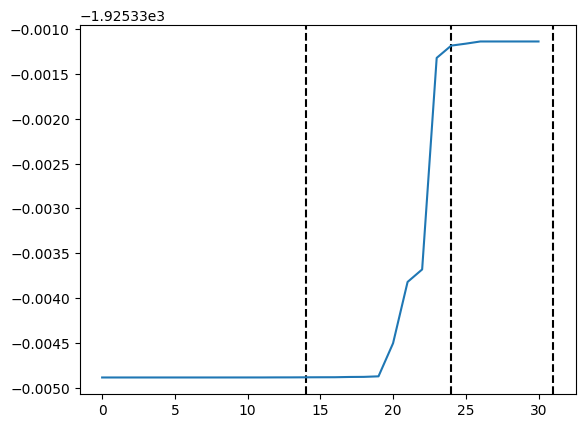

In [38]:
import matplotlib.pyplot as plt

# full = energies[0]
# plt.axhline(y=1.6e-3, linestyle=":", color="green")
# plt.axhline(y=basic_cc.e_tot, linestyle="--", color="black")
for shell in driver.localized_system.shells:
    plt.axvline(x=shell, linestyle="--", color="black")
plt.plot(range(len(energies)), energies)
plt.show()

# Reducing the size of the active space for embedded calculations

It is important to note that the 

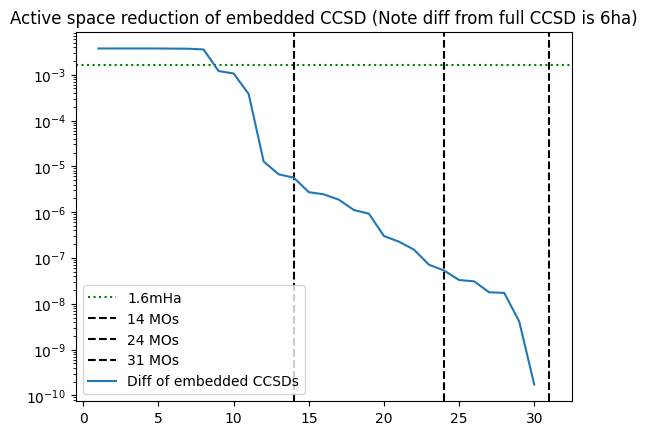

In [49]:
import matplotlib.pyplot as plt

full = energies[0]
plt.axhline(y=1.6e-3, linestyle=":", color="green")
diffs = [abs(e-full) for e in energies[1:][::-1]]
# plt.axhline(y=basic_cc.e_tot, linestyle="--", color="black")
for shell in driver.localized_system.shells:
    plt.axvline(x=shell, linestyle="--", color="black")
plt.semilogy(range(1,driver.embedded_scf[0].mo_coeff.shape[-1]), diffs)
plt.title("Active space reduction of embedded CCSD (Note diff from full CCSD is 6ha)")
plt.legend(["1.6mHa"] + [f"{i} MOs" for i in driver.localized_system.shells] + ["Diff of embedded CCSDs"])
plt.show()

## Building Hamiltonians

How do we build correctly build hamiltonians using reduced active space?

In [63]:
active_sizes = [i for i in range(6, driver.localized_system.shells[0])] + driver.localized_system.shells

In [65]:
from nbed.ham_builder import HamiltonianBuilder
from openfermion.utils import count_qubits
resources = {"n_terms": [], "n_qubits": []}

for i in active_sizes:
    hb = HamiltonianBuilder(driver.embedded_scf[0], constant_e_shift=driver.classical_energy[0])
    qham = hb.build(taper=True, core_indices=[], active_indices=[i for i in range(i)])
    resources["n_terms"].append(len(qham.terms))
    resources["n_qubits"].append(count_qubits(qham))

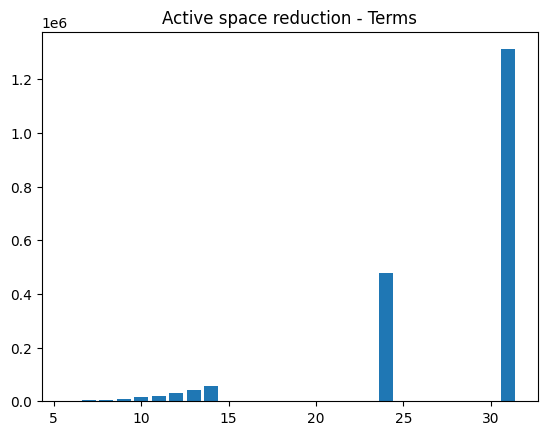

In [68]:
import matplotlib.pyplot as plt

plt.bar(active_sizes, resources["n_terms"])
plt.title("Active space reduction - Terms")
plt.show()

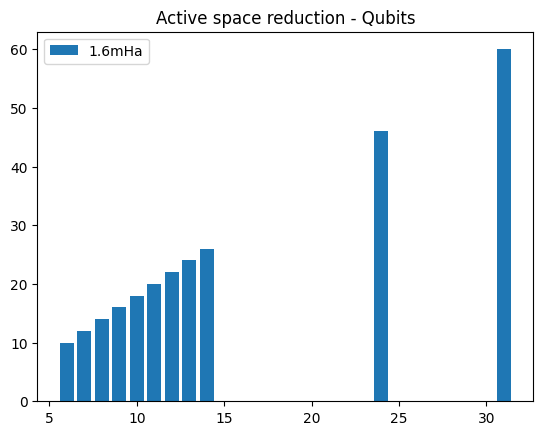

In [69]:
plt.bar(active_sizes, resources["n_qubits"])
plt.title("Active space reduction - Qubits")
plt.legend(["1.6mHa"] + [f"{i} MOs" for i in driver.localized_system.shells] + ["Diff of embedded CCSDs"])
plt.show()

# Run CCSD for different bond lengths

In [117]:
from pathlib import Path
ccbond_energies = []
for geometry in Path("molecular_structures/pfoa_stretch").glob("*.xyz"):
    mol = Mole(atom=str(geometry), basis="sto-3g", verbose=4)
    mol.build()
    mf = RHF(mol)
    mf.kernel()
    ccsd = cc.CCSD(mf)
    try:
        ccsd.kernel()
        ccbond_energies.append(ccsd.e_tot)
    except:
        ccbond_energies.append(None)

print(ccbond_energies)

System: uname_result(system='Darwin', node='MacBook-Pro-de-Michael.local', release='23.1.0', version='Darwin Kernel Version 23.1.0: Mon Oct  9 21:32:11 PDT 2023; root:xnu-10002.41.9~7/RELEASE_ARM64_T6030', machine='arm64')  Threads 1
Python 3.10.11 (v3.10.11:7d4cc5aa85, Apr  4 2023, 19:05:19) [Clang 13.0.0 (clang-1300.0.29.30)]
numpy 1.22.4  scipy 1.9.3
Date: Thu Feb 29 13:00:30 2024
PySCF version 2.4.0
PySCF path  /Users/michaelwilliamsdelabastida/Library/Caches/pypoetry/virtualenvs/nbed-1_9TTDE1-py3.10/lib/python3.10/site-packages/pyscf

[CONFIG] conf_file None
[INPUT] verbose = 4
[INPUT] num. atoms = 26
[INPUT] num. electrons = 200
[INPUT] charge = 0
[INPUT] spin (= nelec alpha-beta = 2S) = 0
[INPUT] symmetry False subgroup None
[INPUT] Mole.unit = angstrom
[INPUT] Symbol           X                Y                Z      unit          X                Y                Z       unit  Magmom
[INPUT]  1 F      0.797720000000  -6.417040000000  -1.121960000000 AA    1.507472324088 -12.12

/Users/michaelwilliamsdelabastida/Library/Caches/pypoetry/virtualenvs/nbed-1_9TTDE1-py3.10/lib/python3.10/site-packages/pyscf/cc/ccsd.py:180: RuntimeWarning: invalid value encountered in subtract
  t2new[:,:,p0:p1] -= lib.einsum('ka,jbki->jiba', t1, tmp)
/Users/michaelwilliamsdelabastida/Library/Caches/pypoetry/virtualenvs/nbed-1_9TTDE1-py3.10/lib/python3.10/site-packages/pyscf/cc/ccsd.py:188: RuntimeWarning: overflow encountered in multiply
  theta  = tau.transpose(1,0,2,3) * 2
/Users/michaelwilliamsdelabastida/Library/Caches/pypoetry/virtualenvs/nbed-1_9TTDE1-py3.10/lib/python3.10/site-packages/pyscf/cc/ccsd.py:189: RuntimeWarning: invalid value encountered in subtract
  theta -= tau
/Users/michaelwilliamsdelabastida/Library/Caches/pypoetry/virtualenvs/nbed-1_9TTDE1-py3.10/lib/python3.10/site-packages/pyscf/cc/ccsd.py:208: RuntimeWarning: invalid value encountered in add
  t2new[:,:,q0:q1] += tmp.transpose(2,0,1,3)
/Users/michaelwilliamsdelabastida/Library/Caches/pypoetry/virtualenvs

cycle = 5  E_corr(CCSD) = nan  dE = nan  norm(t1,t2) = nan
cycle = 6  E_corr(CCSD) = nan  dE = nan  norm(t1,t2) = nan
cycle = 7  E_corr(CCSD) = nan  dE = nan  norm(t1,t2) = nan
cycle = 8  E_corr(CCSD) = nan  dE = nan  norm(t1,t2) = nan
cycle = 9  E_corr(CCSD) = nan  dE = nan  norm(t1,t2) = nan
cycle = 10  E_corr(CCSD) = nan  dE = nan  norm(t1,t2) = nan
cycle = 11  E_corr(CCSD) = nan  dE = nan  norm(t1,t2) = nan
cycle = 12  E_corr(CCSD) = nan  dE = nan  norm(t1,t2) = nan
cycle = 13  E_corr(CCSD) = nan  dE = nan  norm(t1,t2) = nan
cycle = 14  E_corr(CCSD) = nan  dE = nan  norm(t1,t2) = nan
cycle = 15  E_corr(CCSD) = nan  dE = nan  norm(t1,t2) = nan
cycle = 16  E_corr(CCSD) = nan  dE = nan  norm(t1,t2) = nan
cycle = 17  E_corr(CCSD) = nan  dE = nan  norm(t1,t2) = nan
cycle = 18  E_corr(CCSD) = nan  dE = nan  norm(t1,t2) = nan
cycle = 19  E_corr(CCSD) = nan  dE = nan  norm(t1,t2) = nan
cycle = 20  E_corr(CCSD) = nan  dE = nan  norm(t1,t2) = nan
cycle = 21  E_corr(CCSD) = nan  dE = nan  nor

# Run embedding for different bond lengths

In [ ]:
for geometry in Path("molecular_structures/pfoa_stretch").glob("*.xyz"):
    driver = NbedDriver(geometry=str(geometry), n_active_atoms=2, basis="sto-3g", xc_functional="b3lyp", projector="both", localization="spade", convergence=1e-6, max_ram_memory=8_000)
    